# MNIST 隨機旋轉後分類

In [195]:
import numpy as np
import pandas as pd
import keras
from keras.utils import np_utils
from keras.datasets import mnist
import tensorflow as tf

config = tf.ConfigProto(gpu_options=tf.GPUOptions(allow_growth=True))
sess = tf.Session(config=config)

In [196]:
(x_Train,y_Train),(x_Test,y_Test) = keras.datasets.mnist.load_data()

In [197]:
import matplotlib.pyplot as plt
def plot_image(image):
    fig = plt.gcf()
    fig.set_size_inches(2,2)
    plt.imshow(image , cmap='binary')
    plt.show()

In [198]:
import argparse
import cv2
# https://pypi.org/project/opencv-python/

def image_rotate(image,angle,center=None,scale=1.0):
    # 圖片大小
    (h,w)=image.shape[:2]
    # 若未指定旋轉中心，就以圖像中心為準
    if center is None:
        center = (w/2,h/2)
    # 旋轉
    M = cv2.getRotationMatrix2D(center,angle,scale)
    rotated = cv2.warpAffine(image,M,(w,h))
    
    # 回傳以旋轉之圖像
    return rotated

In [199]:
# 初始化旋轉圖矩陣
x_Train_rotate = np.empty(x_Train.shape)
x_Test_rotate = np.empty(x_Test.shape)

# 將圖隨機角度旋轉
for i in range(0,x_Train.shape[0]):
    x_Train_rotate[i]=image_rotate(x_Train[i],np.random.randint(0,360))

for i in range(0,x_Test.shape[0]):
    x_Test_rotate[i]=image_rotate(x_Test[i],np.random.randint(0,360))


旋轉前：


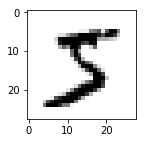

旋轉後：


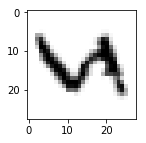

In [217]:
print('旋轉前：')
plot_image(x_Train[0])
print('旋轉後：')
plot_image(x_Train_rotate[0])

# CNN

### 初始化

In [208]:
#多加一顏色維度
x_Train4D =x_Train_rotate.reshape(x_Train_rotate.shape[0],28,28,1).astype('float32')
x_Test4D =x_Test_rotate.reshape(x_Test_rotate.shape[0],28,28,1).astype('float32')

# Normalization
x_Train4D = x_Train4D /255
x_Test4D = x_Test4D  /255

# one hot encoding
y_TrainOneHot = np_utils.to_categorical(y_Train)
y_TestOneHot = np_utils.to_categorical(y_Test)

### Build Model

In [209]:
from keras.models import Sequential
from keras.layers import Dense, Dropout,Flatten,Conv2D,MaxPooling2D

In [210]:
model = Sequential()
model.add(Conv2D(filters=16,
                kernel_size=(5,5),
                padding='same',
                input_shape=(28,28,1),
                activation = 'relu'
               ))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(filters=36,
                kernel_size=(5,5),
                padding='same',
                input_shape=(28,28,1),
                activation = 'relu'
               ))
model.add(MaxPooling2D(pool_size=(2,2)))

# Drop 掉部分神經元，避免 overfitting
model.add(Dropout(rate = 0.25))


model.add(Flatten())

model.add(Dense(units=128,activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(units=10,activation='softmax'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 28, 28, 16)        416       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 14, 14, 36)        14436     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 7, 7, 36)          0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 7, 7, 36)          0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 1764)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 128)               225920    
__________

In [211]:
model.compile(loss = 'categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

### Train model

In [212]:
train_history=model.fit(x=x_Train4D, 
                        y=y_TrainOneHot,validation_split=0.2, 
                        epochs=50, batch_size=200,verbose=2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/50
 - 7s - loss: 1.1096 - acc: 0.6134 - val_loss: 0.4738 - val_acc: 0.8498
Epoch 2/50
 - 11s - loss: 0.5649 - acc: 0.8124 - val_loss: 0.3384 - val_acc: 0.8896
Epoch 3/50
 - 14s - loss: 0.4498 - acc: 0.8536 - val_loss: 0.2817 - val_acc: 0.9068
Epoch 4/50
 - 14s - loss: 0.3910 - acc: 0.8719 - val_loss: 0.2474 - val_acc: 0.9173
Epoch 5/50
 - 14s - loss: 0.3477 - acc: 0.8858 - val_loss: 0.2313 - val_acc: 0.9225
Epoch 6/50
 - 13s - loss: 0.3235 - acc: 0.8934 - val_loss: 0.2329 - val_acc: 0.9200
Epoch 7/50
 - 13s - loss: 0.3054 - acc: 0.8984 - val_loss: 0.2163 - val_acc: 0.9268
Epoch 8/50
 - 14s - loss: 0.2850 - acc: 0.9049 - val_loss: 0.2062 - val_acc: 0.9295
Epoch 9/50
 - 14s - loss: 0.2722 - acc: 0.9114 - val_loss: 0.1978 - val_acc: 0.9322
Epoch 10/50
 - 14s - loss: 0.2640 - acc: 0.9118 - val_loss: 0.1923 - val_acc: 0.9343
Epoch 11/50
 - 14s - loss: 0.2507 - acc: 0.9141 - val_loss: 0.1989 - val_acc: 0.9307
Epoch 12/50
 - 14s - loss

In [230]:
def show_train_history(train_acc,val_acc,y_label):
    plt.plot(train_history.history[train_acc])
    plt.plot(train_history.history[val_acc])
    plt.title('Train History')
    plt.ylabel(y_label)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper right')
    plt.show()

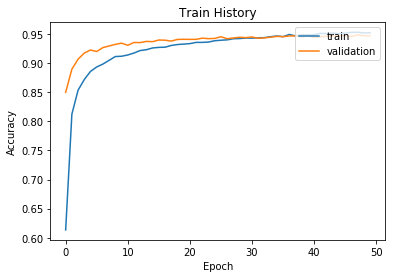

In [231]:
show_train_history('acc','val_acc','Accuracy')

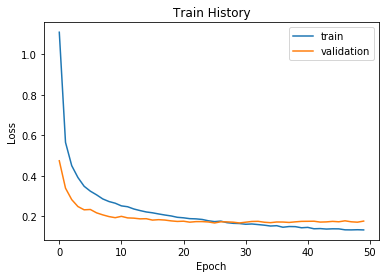

In [232]:
show_train_history('loss','val_loss','Loss')

### Test

In [216]:
scores = model.evaluate(x_Test4D , y_TestOneHot)
scores[1]

10000/10000 [==============================] - 4s 357us/step


0.9531

In [233]:
prediction = model.predict_classes(x_Test4D)
pd.crosstab(y_Test,prediction,
            rownames=['label'],colnames=['predict'])

predict,0,1,2,3,4,5,6,7,8,9
label,,,,,,,,,,
0,968,0,4,1,0,0,3,0,1,3
1,0,1124,2,0,3,0,0,4,0,2
2,2,1,1002,0,3,0,1,21,2,0
3,0,0,1,994,1,6,4,2,1,1
4,0,1,1,0,959,3,3,4,3,8
5,1,0,0,6,7,854,6,5,1,12
6,3,1,0,2,1,4,848,31,0,68
7,0,8,15,2,13,1,3,983,1,2
8,2,1,11,7,8,1,2,1,935,6
